In [21]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [22]:
# Read the dataset
file_path = "D:/Stevens/KDD/breast-cancer-wisconsin.csv"
df = pd.read_csv(file_path, header=None)

# Replace "?" with NaN and drop missing values
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

In [23]:
# Define features and target variable
features = df.iloc[:, 1:-1]  # Exclude 'Sample code number' and 'Diagnosis Class'
target = df[10]  # Assuming 'Class' is the last column

# Convert features to the category data type
features = features.astype('category')

# One-hot encode categorical features
features = pd.get_dummies(features, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [24]:
# 6.1: Use C5.0 methodology (Decision Tree)
# Train a Decision Tree model
c50_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
c50_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

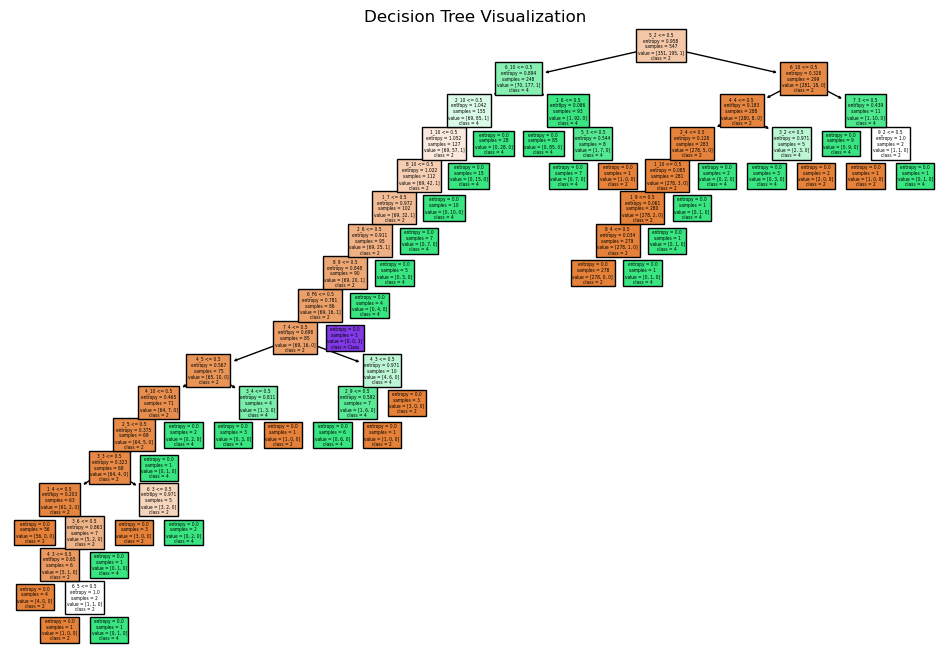

In [25]:
# Plot Decision Tree for visualization
plt.figure(figsize=(12, 8))
plot_tree(c50_model, filled=True, feature_names=features.columns, class_names=c50_model.classes_)
plt.title("Decision Tree Visualization")
plt.show()

# Making predictions on the test set using Decision Tree
c50_predictions = c50_model.predict(X_test)



In [26]:
# 6.2: Use Random Forest methodology
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

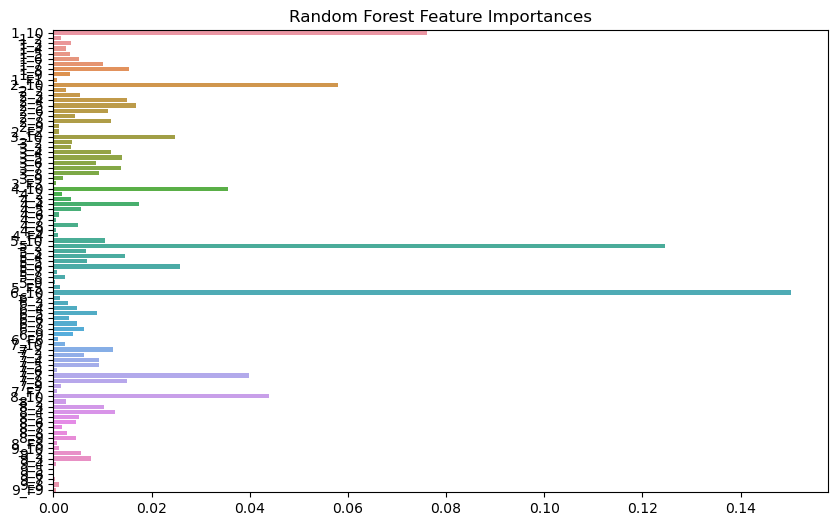

In [27]:
# Plot Feature Importances for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model.feature_importances_, y=features.columns)
plt.title("Random Forest Feature Importances")
plt.show()

# Making predictions on the test set using Random Forest
rf_predictions = rf_model.predict(X_test)




Random Forest Model Accuracy: 0.9781021897810219
Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.98      0.98        93
           4       0.96      0.98      0.97        44

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



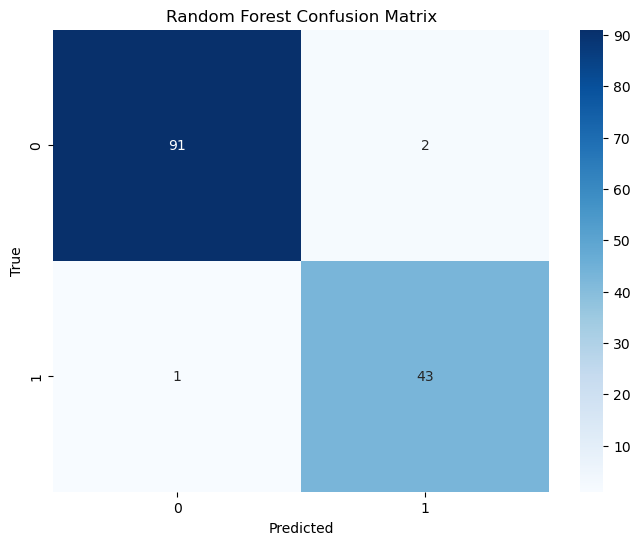

In [28]:
# Evaluating the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Model Accuracy:", rf_accuracy)
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()